In [9]:
# Libraries
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Data Input
# Paths to datasets
train_path = 'Data/train' 
val_path = 'Data/val'     
img_height = 180
img_width = 180

In [3]:
# Data Load: Loading training and validation datasets from directories
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(img_height, img_width),
    batch_size=32
)
val_data = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=(img_height, img_width),
    batch_size=32
)

Found 40000 files belonging to 100 classes.
Found 5000 files belonging to 100 classes.


In [4]:
# Inspect datasets
class_names = train_data.class_names
print(f"Class names: {class_names}")

Class names: ['abiu', 'acai', 'acerola', 'ackee', 'ambarella', 'apple', 'apricot', 'avocado', 'banana', 'barbadine', 'barberry', 'betel_nut', 'bitter_gourd', 'black_berry', 'black_mullberry', 'brazil_nut', 'camu_camu', 'cashew', 'cempedak', 'chenet', 'cherimoya', 'chico', 'chokeberry', 'cluster_fig', 'coconut', 'corn_kernel', 'cranberry', 'cupuacu', 'custard_apple', 'damson', 'dewberry', 'dragonfruit', 'durian', 'eggplant', 'elderberry', 'emblic', 'feijoa', 'fig', 'finger_lime', 'gooseberry', 'goumi', 'grape', 'grapefruit', 'greengage', 'grenadilla', 'guava', 'hard_kiwi', 'hawthorn', 'hog_plum', 'horned_melon', 'indian_strawberry', 'jaboticaba', 'jackfruit', 'jalapeno', 'jamaica_cherry', 'jambul', 'jocote', 'jujube', 'kaffir_lime', 'kumquat', 'lablab', 'langsat', 'longan', 'mabolo', 'malay_apple', 'mandarine', 'mango', 'mangosteen', 'medlar', 'mock_strawberry', 'morinda', 'mountain_soursop', 'oil_palm', 'olive', 'otaheite_apple', 'papaya', 'passion_fruit', 'pawpaw', 'pea', 'pineapple',

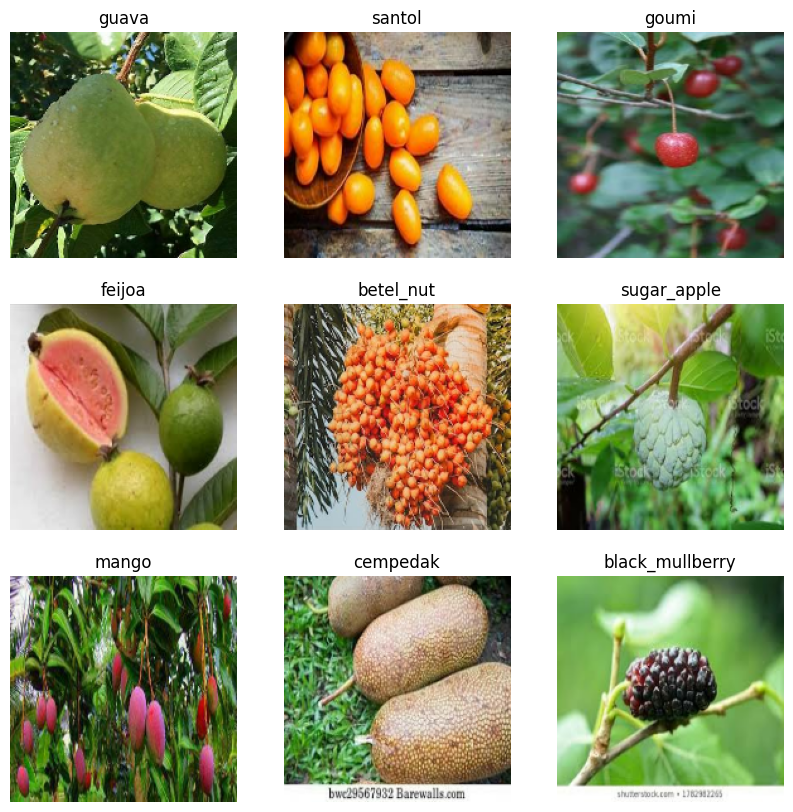

In [6]:
# Data Visualization: Plotting sample images
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
# Define the model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),  # Explicitly specify the input shape
    layers.Rescaling(1./255),  # Normalize pixel values
    
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [11]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Model Training
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
 379/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 54ms/step - accuracy: 0.0184 - loss: 4.5215 

KeyboardInterrupt: 

In [13]:
# Data Visualization: Training and validation metrics
# Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
# Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Predict on a single image
def predict_image(Sample):
    # Load and preprocess the image
    img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img) / 255.0
    img_batch = tf.expand_dims(img_array, 0)
    
    # Predict the class
    predictions = model.predict(img_batch)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = tf.nn.softmax(predictions[0])[tf.argmax(predictions[0])] * 100
    print(f"The image is a {predicted_class} with {confidence:.2f}% confidence.")

In [ ]:
# Test the model with an example image
test_image_path = 'mango.jpg'
predict_image(test_image_path)